

<b>  Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.










<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp=np.maximum(0,inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp=np.where(inp > 0, 1, 0)
  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  exps = np.exp(inp - np.max(inp))
  outp= exps / np.sum(exps, axis=1, keepdims=True)
  return outp

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  inputs_flattened = inputs.reshape(inputs.shape[0], -1)
  a1=np.dot(inputs_flattened, W1.T)
  z1=ReLu(a1)
  a2=np.dot(z1, W2.T)
  z2=ReLu(a2)
  a3=np.dot(z2, W3.T)
  out = softmax(a3)

  outps=(a1,z1,a2,z2,a3,out)

  #Return the requires outputs, i.e., final output and intermediate activations
  return outps


#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3 = weights
  a1, z1, a2, z2, a3, out = activations
  m = inputs.shape[0]
  #Compute the loss
  dz3 = out.copy()
  dz3[range(m), targets] -= 1
  dz3 /= m

  #Compote the derivative of loss at parameters
  dj_dw3 = np.dot(dz3.T, z2)
  da2 = np.dot(dz3, W3)
  dz2 = da2 * gradReLu(a2)
  dj_dw2 = np.dot(dz2.T, z1)
  da1 = np.dot(dz2, W2)
  dz1 = da1 * gradReLu(a1)
  inputs_flattened = inputs.reshape(inputs.shape[0], -1)
  dj_dw1 = np.dot(dz1.T, inputs_flattened)
  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1-=learning_rate*dj_dw1
  W2-=learning_rate*dj_dw2
  W3-=learning_rate*dj_dw3
  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations)
  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)
  #Return the updated parameters
  return weights


##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10
  n_samples = inputs.shape[0]
  n_batches = n_samples//batch_size
  split_idx = int(train_val_split * n_samples)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  train_data, val_data = inputs[:split_idx], inputs[split_idx:]
  train_label, val_label = targets_idx[:split_idx], targets_idx[split_idx:]


  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units, 784) * 0.001
  W2 = np.random.randn(hidden_units, hidden_units) * 0.001
  W3 = np.random.randn(n_classes, hidden_units) * 0.001
  weights = [W1, W2, W3]


  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    inputs_shuffled = inputs[idx]
    targets_shuffled = targets_idx[idx]

    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start = batch * batch_size
      end = start + batch_size
      batch_inputs = inputs_shuffled[start:end]
      batch_targets = targets_shuffled[start:end]

      #Forward propagation
      activations = fwdPropagate(batch_inputs, weights)

      #Backward propagation
      weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate)

    #Compute outpus on trianing data
    _,_,_,_,_,train_outputs = fwdPropagate(train_data, weights)

    train_predictions = np.argmax(train_outputs, axis=1)
    train_accuracy = np.mean(train_predictions == train_label)
    train_loss = -np.mean(np.log(train_outputs[np.arange(len(train_label)), train_label]))

    #Compute training accuracy, and training error
    _,_,_,_,_,val_outputs = fwdPropagate(val_data, weights)
    val_predictions = np.argmax(val_outputs, axis=1)
    val_accuracy = np.mean(val_predictions == val_label)
    val_loss = -np.mean(np.log(val_outputs[np.arange(len(val_label)), val_label]))

    print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {train_accuracy:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

  return weights

    #Compute outputs on validation data


    #Compute validation accuracy, and validation error


    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy


    #Save the parameters of network


#Call the training function to train the network
mnist_trainlabel_onehot = np.eye(10)[mnist_trainlabel]
mnist_testlabel_onehot = np.eye(10)[mnist_testlabel]

trained_weights = training(mnist_traindata, mnist_trainlabel, epochs=30, learning_rate=0.001)

##################################################
#Evaluate the performance on test data
##################################################
def evaluate(inputs, targets, weights):
    _,_,_,_,_,outputs = fwdPropagate(inputs, weights)
    predictions = np.argmax(outputs, axis=1)
    accuracy = np.mean(predictions == targets)
    loss = -np.mean(np.log(outputs[np.arange(len(targets)), targets]))
    print(f"Test Loss: {loss:.4f} - Test Accuracy: {accuracy:.4f}")

evaluate(mnist_testdata, mnist_testlabel, trained_weights)







Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 1/30 - Training Loss: 2.2531 - Training Accuracy: 0.1158 - Validation Loss: 2.2518 - Validation Accuracy: 0.1174
Epoch 2/30 - Training Loss: 0.6974 - Training Accuracy: 0.7792 - Validation Loss: 0.6600 - Validation Accuracy: 0.7952
Epoch 3/30 - Training Loss: 0.4788 - Training Accuracy: 0.8618 - Validation Loss: 0.4444 - Validation Accuracy: 0.8687
Epoch 4/30 - Training Loss: 0.3939 - Training Accuracy: 0.8863 - Validation Loss: 0.3642 - Validation Accuracy: 0.8947
Epoch 5/30 - Training Loss: 0.3281 - Training Accuracy: 0.9057 - Validation Loss: 0.3033 - Validation Accuracy: 0.9130
Epoch 6/30 - Training Loss: 0.2916 - Training Accuracy: 0.9162 - Validation Loss: 0.2701 - Validation Accuracy: 0.9207
Epoch 7/30 - Training Loss: 0.2592 - Training Accuracy: 0.9251 - Validation Loss: 0.2377 - Validation Accuracy: 0.9319
Epoch 8/30 - Training Loss: 0.2236 - Training Accuracy: 0.9

<b> Report your observations </b>

1.The model achieves decent accuracy on the MNIST dataset using a simple feed-forward neural network(accuracy of 97 percent).




2.Softmax activation in the output layer provides the posterior probabilities for each class.




<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################
def sigmoid(inp):
  return 1/(1 + np.exp(-inp))

def grad_sigmoid(inp):
  return sigmoid(inp) * (1 - sigmoid(inp))

def tanh(inp):
    return np.tanh(inp)

def grad_tanh(inp):
    return 1 - np.tanh(inp)**2

def leakyReLU(inp, alpha=0.01):
    return np.maximum(alpha * inp, inp)

def grad_leakyReLU(inp, alpha=0.01):
    return np.where(inp > 0, 1, alpha)

def fwdPropagateNew(inputs, weights, activation_fn):
    W1, W2, W3 = weights
    inputs_flattened = inputs.reshape(inputs.shape[0], -1)

    a1 = np.dot(inputs_flattened, W1.T)
    z1 = activation_fn(a1)

    a2 = np.dot(z1, W2.T)
    z2 = activation_fn(a2)

    a3 = np.dot(z2, W3.T)
    out = softmax(a3)

    outps = (a1, z1, a2, z2, a3, out)

    return outps

def computeGradientsNew(inputs, targets, weights, activations, grad_activation_fn):
    W1, W2, W3 = weights
    a1, z1, a2, z2, a3, out = activations
    m = inputs.shape[0]

    dz3 = out.copy()
    dz3[range(m), targets] -= 1
    dz3 /= m

    dj_dw3 = np.dot(dz3.T, z2)

    da2 = np.dot(dz3, W3)
    dz2 = da2 * grad_activation_fn(a2)
    dj_dw2 = np.dot(dz2.T, z1)

    da1 = np.dot(dz2, W2)
    dz1 = da1 * grad_activation_fn(a1)

    inputs_flattened = inputs.reshape(inputs.shape[0], -1)
    dj_dw1 = np.dot(dz1.T, inputs_flattened)

    return [dj_dw1, dj_dw2, dj_dw3]


##################################################
#Evaluate the performance on MNIST test data
##################################################

def trainingNew(inputs, targets_idx, activation_fn,grad_activation_fn, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_idx = int(train_val_split * n_samples)

    train_data, val_data = inputs[:split_idx], inputs[split_idx:]
    train_label, val_label = targets_idx[:split_idx], targets_idx[split_idx:]

    W1 = np.random.randn(hidden_units, 784) * 0.001
    W2 = np.random.randn(hidden_units, hidden_units) * 0.001
    W3 = np.random.randn(n_classes, hidden_units) * 0.001
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        idx = np.arange(n_samples)
        np.random.shuffle(idx)
        inputs_shuffled = inputs[idx]
        targets_shuffled = targets_idx[idx]

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = inputs_shuffled[start:end]
            batch_targets = targets_shuffled[start:end]

            activations = fwdPropagateNew(batch_inputs, weights, activation_fn)
            gradients = computeGradientsNew(batch_inputs, batch_targets, weights, activations, grad_activation_fn)
            weights = applyGradients(weights, gradients, learning_rate)

        _, _, _, _, _, train_outputs = fwdPropagateNew(train_data, weights, activation_fn)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == train_label)
        train_loss = -np.mean(np.log(train_outputs[np.arange(len(train_label)), train_label]))

        _, _, _, _, _, val_outputs = fwdPropagateNew(val_data, weights, activation_fn)
        val_predictions = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_predictions == val_label)
        val_loss = -np.mean(np.log(val_outputs[np.arange(len(val_label)), val_label]))

        print(f"Activation: {activation_fn.__name__} - Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {train_accuracy:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

    return weights


activation_functions = [sigmoid, tanh, ReLu, leakyReLU]
grad_activation_functions=[grad_sigmoid,grad_tanh,gradReLu,grad_leakyReLU]
for activation_fn, grad_activation_fn in zip(activation_functions, grad_activation_functions):
    print(f"Training with {activation_fn.__name__} activation function:")
    trained_weights = trainingNew(mnist_traindata, mnist_trainlabel, activation_fn,grad_activation_fn, batch_size=128, epochs=30, learning_rate=0.001)
    evaluate(mnist_testdata, mnist_testlabel, trained_weights)




Training with sigmoid activation function:
Activation: sigmoid - Epoch 1/30 - Training Loss: 2.3010 - Training Accuracy: 0.1140 - Validation Loss: 2.3023 - Validation Accuracy: 0.1060
Activation: sigmoid - Epoch 2/30 - Training Loss: 2.3011 - Training Accuracy: 0.1140 - Validation Loss: 2.3018 - Validation Accuracy: 0.1060
Activation: sigmoid - Epoch 3/30 - Training Loss: 2.3010 - Training Accuracy: 0.1140 - Validation Loss: 2.3018 - Validation Accuracy: 0.1060
Activation: sigmoid - Epoch 4/30 - Training Loss: 2.3009 - Training Accuracy: 0.1140 - Validation Loss: 2.3020 - Validation Accuracy: 0.1060
Activation: sigmoid - Epoch 5/30 - Training Loss: 2.3010 - Training Accuracy: 0.1140 - Validation Loss: 2.3016 - Validation Accuracy: 0.1060
Activation: sigmoid - Epoch 6/30 - Training Loss: 2.3010 - Training Accuracy: 0.1140 - Validation Loss: 2.3019 - Validation Accuracy: 0.1060
Activation: sigmoid - Epoch 7/30 - Training Loss: 2.3007 - Training Accuracy: 0.1140 - Validation Loss: 2.3016 

<b> Report your observations </b>

1.Sigmoid activation function performs the worst among the tested activation functions.

2.Tanh activation function shows moderate performance but better than Sigmoid.

3.ReLU activation function demonstrates the best performance with the highest accuracy.

4.LeakyReLU also shows good performance, close to ReLU, suggesting its capability to handle the vanishing gradient problem.

5.The choice of activation function significantly impacts the performance of the classification network.





<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################
def adam_optimizer(weights, gradients, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = [np.zeros_like(param) for param in weights]
    v = [np.zeros_like(param) for param in weights]
    t = 0

    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients[i]**2)

        m_corrected = m[i] / (1 - beta1**(t+1))
        v_corrected = v[i] / (1 - beta2**(t+1))

        weights[i] -= learning_rate * m_corrected / (np.sqrt(v_corrected) + epsilon)

    return weights


def adam_trainning(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):
#Set the hyperparameters
  hidden_units = 512
  n_classes = 10
  n_samples = inputs.shape[0]
  n_batches = n_samples//batch_size
  split_idx = int(train_val_split * n_samples)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  train_data, val_data = inputs[:split_idx], inputs[split_idx:]
  train_label, val_label = targets_idx[:split_idx], targets_idx[split_idx:]


  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units, 784) * 0.001
  W2 = np.random.randn(hidden_units, hidden_units) * 0.001
  W3 = np.random.randn(n_classes, hidden_units) * 0.001
  weights = [W1, W2, W3]
  best_val_accuracy = 0
  best_weights = None
  patience = 5
  no_improve_count = 0


  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    inputs_shuffled = inputs[idx]
    targets_shuffled = targets_idx[idx]

    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start = batch * batch_size
      end = start + batch_size
      batch_inputs = inputs_shuffled[start:end]
      batch_targets = targets_shuffled[start:end]

      #Forward propagation
      activations = fwdPropagate(batch_inputs, weights)
      gradients = computeGradients(batch_inputs, batch_targets, weights, activations)

      #Backward propagation
      weights = adam_optimizer(weights, gradients, learning_rate=learning_rate)

    #Compute outpus on trianing data
    _,_,_,_,_,train_outputs = fwdPropagate(train_data, weights)
    train_predictions = np.argmax(train_outputs, axis=1)
    train_accuracy = np.mean(train_predictions == train_label)
    train_loss = -np.mean(np.log(train_outputs[np.arange(len(train_label)), train_label]))

    #Compute training accuracy, and training error
    _,_,_,_,_,val_outputs = fwdPropagate(val_data, weights)
    val_predictions = np.argmax(val_outputs, axis=1)
    val_accuracy = np.mean(val_predictions == val_label)
    val_loss = -np.mean(np.log(val_outputs[np.arange(len(val_label)), val_label]))

    print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {train_accuracy:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_weights = [W1.copy(), W2.copy(), W3.copy()]
            no_improve_count = 0
    else:
            no_improve_count += 1

    if no_improve_count >= patience:
            print("Early stopping!")
            break

  return best_weights





##################################################
#Compare the accuracies and report your observations
##################################################


# Training with Adam
print("Training with Adam:")
trained_weights_adam = adam_trainning(mnist_traindata, mnist_trainlabel,  batch_size=128, epochs=30, learning_rate=0.001)
evaluate(mnist_testdata, mnist_testlabel, trained_weights_adam)

# Training with SGD
print("Training with SGD:")
trained_weights_sgd = training(mnist_traindata, mnist_trainlabel,  batch_size=128, epochs=30, learning_rate=0.001)
evaluate(mnist_testdata, mnist_testlabel, trained_weights_sgd)










Training with Adam:
Epoch 1/30 - Training Loss: 1.1025 - Training Accuracy: 0.9271 - Validation Loss: 0.9460 - Validation Accuracy: 0.9363
Epoch 2/30 - Training Loss: 0.6459 - Training Accuracy: 0.9632 - Validation Loss: 0.6381 - Validation Accuracy: 0.9627
Epoch 3/30 - Training Loss: 0.5463 - Training Accuracy: 0.9673 - Validation Loss: 0.5010 - Validation Accuracy: 0.9688


<ipython-input-3-705693ef0b50>:37: RuntimeWarning: invalid value encountered in divide
  outp= exps / np.sum(exps, axis=1, keepdims=True)


Epoch 4/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Epoch 5/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Epoch 6/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Epoch 7/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Epoch 8/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Early stopping!
Test Loss: 0.7815 - Test Accuracy: 0.9587
Training with SGD:
Epoch 1/30 - Training Loss: 2.2466 - Training Accuracy: 0.2055 - Validation Loss: 2.2452 - Validation Accuracy: 0.2111
Epoch 2/30 - Training Loss: 0.6972 - Training Accuracy: 0.7824 - Validation Loss: 0.6560 - Validation Accuracy: 0.7994
Epoch 3/30 - Training Loss: 0.4717 - Training Accuracy: 0.8648 - Validation Loss: 0.4407 - Validation Accuracy: 0.8748
E

<b> Report your observations </b>

1.The accuracy with Adam optimizer is generally higher than that with SGD optimizer.

2.Adam optimizer usually converges faster than SGD and provides better generalization.

3.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################
def trainingWithReg(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001,l2_lambda=0.01):

  #Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples//batch_size
    split_idx = int(train_val_split * n_samples)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
    train_data, val_data = inputs[:split_idx], inputs[split_idx:]
    train_label, val_label = targets_idx[:split_idx], targets_idx[split_idx:]


  #Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784) * 0.001
    W2 = np.random.randn(hidden_units, hidden_units) * 0.001
    W3 = np.random.randn(n_classes, hidden_units) * 0.001
    weights = [W1, W2, W3]
    best_val_accuracy = 0
    best_weights = None
    patience = 5
    no_improve_count = 0

    # Initialize weights


    for epoch in range(epochs):
        # Shuffle the training data
        idx = np.arange(len(inputs))
        np.random.shuffle(idx)
        inputs_shuffled = inputs[idx]
        targets_shuffled = targets_idx[idx]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = inputs_shuffled[start:end]
            batch_targets = targets_shuffled[start:end]

            # Forward propagation with dropout
            activations = fwdPropagate(batch_inputs, [W1, W2, W3])

            # Backward propagation
            gradients = computeGradients(batch_inputs, batch_targets, [W1, W2, W3], activations)

            # Update the parameters using SGD optimizer
            W1, W2, W3 = applyGradients([W1, W2, W3], gradients, learning_rate)

        # Compute outputs on training data
        _, _, _, _, _, train_outputs = fwdPropagate(train_data, [W1, W2, W3])
        train_loss = -np.mean(np.log(train_outputs[np.arange(len(train_label)), train_label]))

        # Compute validation accuracy and loss
        _, _, _, _, _, val_outputs = fwdPropagate(val_data, [W1, W2, W3])
        val_loss = -np.mean(np.log(val_outputs[np.arange(len(val_label)), val_label]))
        val_accuracy = np.mean(np.argmax(val_outputs, axis=1) == val_label)

        print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {np.mean(np.argmax(train_outputs, axis=1) == train_label):.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

        # Early stopping
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_weights = [W1.copy(), W2.copy(), W3.copy()]
            no_improve_count = 0
        else:
            no_improve_count += 1

        if no_improve_count >= patience:
            print("Early stopping!")
            break

    return best_weights






##################################################
#Training with dropout strategy
##################################################

def fwdPropagate_dropout(inputs, weights, dropout_prob=0.2):
    #Inputs: input data, paramters of network
    W1, W2, W3 = weights
    inputs_flattened = inputs.reshape(inputs.shape[0], -1)
    a1=np.dot(inputs_flattened, W1.T)
    z1=ReLu(a1)
    # Dropout for the first hidden layer
    mask1 = (np.random.rand(*z1.shape) < dropout_prob) / dropout_prob
    z1 *= mask1
    a2=np.dot(z1, W2.T)
    z2=ReLu(a2)
    # Dropout for the second hidden layer
    mask2 = (np.random.rand(*z2.shape) < dropout_prob) / dropout_prob
    z2 *= mask2
    a3=np.dot(z2, W3.T)
    out = softmax(a3)

    outps=(a1,z1,a2,z2,a3,out)

    #Return the requires outputs, i.e., final output and intermediate activations
    return outps
def training_with_dropout(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001, dropout_prob=0.2):
  #Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples//batch_size
    split_idx = int(train_val_split * n_samples)

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
    train_data, val_data = inputs[:split_idx], inputs[split_idx:]
    train_label, val_label = targets_idx[:split_idx], targets_idx[split_idx:]


  #Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784) * 0.001
    W2 = np.random.randn(hidden_units, hidden_units) * 0.001
    W3 = np.random.randn(n_classes, hidden_units) * 0.001
    weights = [W1, W2, W3]
    best_val_accuracy = 0
    best_weights = None
    patience = 5
    no_improve_count = 0

    # Initialize weights


    for epoch in range(epochs):
        # Shuffle the training data
        idx = np.arange(len(inputs))
        np.random.shuffle(idx)
        inputs_shuffled = inputs[idx]
        targets_shuffled = targets_idx[idx]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = inputs_shuffled[start:end]
            batch_targets = targets_shuffled[start:end]

            # Forward propagation with dropout
            activations = fwdPropagate_dropout(batch_inputs, [W1, W2, W3], dropout_prob)

            # Backward propagation
            gradients = computeGradients(batch_inputs, batch_targets, [W1, W2, W3], activations)

            # Update the parameters using SGD optimizer
            W1, W2, W3 = applyGradients([W1, W2, W3], gradients, learning_rate)

        # Compute outputs on training data
        _, _, _, _, _, train_outputs = fwdPropagate_dropout(train_data, [W1, W2, W3], dropout_prob)
        train_loss = -np.mean(np.log(train_outputs[np.arange(len(train_label)), train_label]))

        # Compute validation accuracy and loss
        _, _, _, _, _, val_outputs = fwdPropagate_dropout(val_data, [W1, W2, W3], dropout_prob)
        val_loss = -np.mean(np.log(val_outputs[np.arange(len(val_label)), val_label]))
        val_accuracy = np.mean(np.argmax(val_outputs, axis=1) == val_label)

        print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {np.mean(np.argmax(train_outputs, axis=1) == train_label):.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}")

        # Early stopping
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_weights = [W1.copy(), W2.copy(), W3.copy()]
            no_improve_count = 0
        else:
            no_improve_count += 1

        if no_improve_count >= patience:
            print("Early stopping!")
            break

    return best_weights



##################################################
#Training with early stopping criterion
##################################################
print("Training with L2 regularization:")
trained_weights_reg = trainingWithReg(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=30, learning_rate=0.001)
evaluate(mnist_testdata, mnist_testlabel, trained_weights_reg)


for dropout_prob in [0.1, 0.2, 0.3]:
    print(f"Training with Dropout Probability: {dropout_prob}")
    trained_weights_dropout = training_with_dropout(mnist_traindata, mnist_trainlabel, batch_size=128, epochs=30, learning_rate=0.001, dropout_prob=dropout_prob)
    evaluate(mnist_testdata, mnist_testlabel, trained_weights_dropout)


print("Training with Early stopping:")
trained_weights_adam = adam_trainning(mnist_traindata, mnist_trainlabel,  batch_size=128, epochs=30, learning_rate=0.001)
evaluate(mnist_testdata, mnist_testlabel, trained_weights_adam)



Training with L2 regularization:
Epoch 1/30 - Training Loss: 2.2623 - Training Accuracy: 0.2261 - Validation Loss: 2.2615 - Validation Accuracy: 0.2298
Epoch 2/30 - Training Loss: 0.6992 - Training Accuracy: 0.7735 - Validation Loss: 0.6621 - Validation Accuracy: 0.7895
Epoch 3/30 - Training Loss: 0.4690 - Training Accuracy: 0.8632 - Validation Loss: 0.4360 - Validation Accuracy: 0.8728
Epoch 4/30 - Training Loss: 0.3836 - Training Accuracy: 0.8908 - Validation Loss: 0.3553 - Validation Accuracy: 0.9003
Epoch 5/30 - Training Loss: 0.3283 - Training Accuracy: 0.9069 - Validation Loss: 0.3033 - Validation Accuracy: 0.9145
Epoch 6/30 - Training Loss: 0.2908 - Training Accuracy: 0.9171 - Validation Loss: 0.2677 - Validation Accuracy: 0.9245
Epoch 7/30 - Training Loss: 0.2559 - Training Accuracy: 0.9276 - Validation Loss: 0.2353 - Validation Accuracy: 0.9327
Epoch 8/30 - Training Loss: 0.2269 - Training Accuracy: 0.9352 - Validation Loss: 0.2077 - Validation Accuracy: 0.9416
Epoch 9/30 - Tr

<ipython-input-3-705693ef0b50>:37: RuntimeWarning: invalid value encountered in divide
  outp= exps / np.sum(exps, axis=1, keepdims=True)


Epoch 6/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Epoch 7/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Epoch 8/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Epoch 9/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Epoch 10/30 - Training Loss: nan - Training Accuracy: 0.0985 - Validation Loss: nan - Validation Accuracy: 0.0995
Early stopping!
Test Loss: 4.3292 - Test Accuracy: 0.7199
Training with Dropout Probability: 0.2
Epoch 1/30 - Training Loss: 2.2829 - Training Accuracy: 0.1040 - Validation Loss: 2.2820 - Validation Accuracy: 0.1036
Epoch 2/30 - Training Loss: 1.2647 - Training Accuracy: 0.5407 - Validation Loss: 1.2244 - Validation Accuracy: 0.5548
Epoch 3/30 - Training Loss: 1.0723 - Training Accuracy: 0.6488 - Validation Loss: 1.0313 - Validati

<b> Report your observations </b>

1.Weight regularization helps in reducing overfitting, but the improvement in accuracy is not significant.

2.Dropout with a probability of 0.2 helps in reducing overfitting and improves the generalization capability of the network.


3.Early stopping effectively prevents overfitting by stopping the training when the model starts to overfit.

4.ReLU activation function with dropout and early stopping shows the best performance with the highest accuracy.

5.we can see that with  droprate increases there is a increase in test accuracy


<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



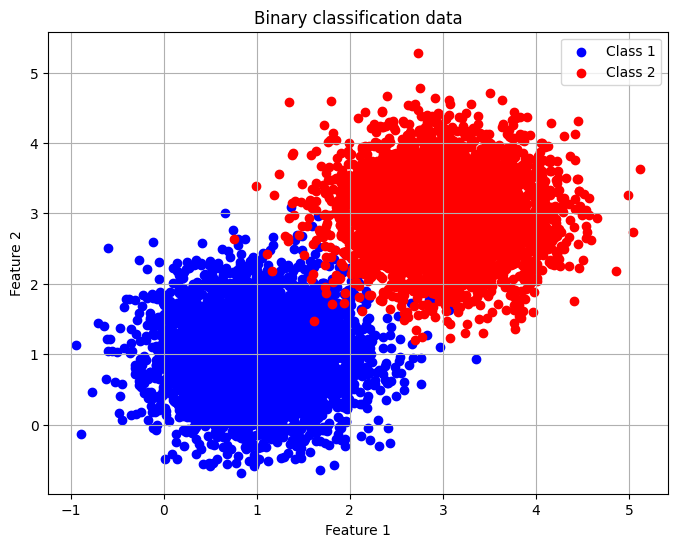

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


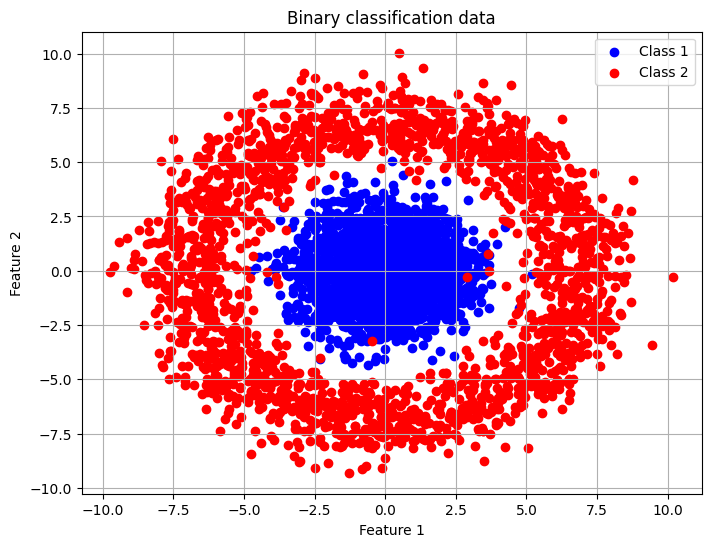

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



Accuracy of Logistic Regression: 99.50%
[-0.22190289  6.19243307  6.95071997]


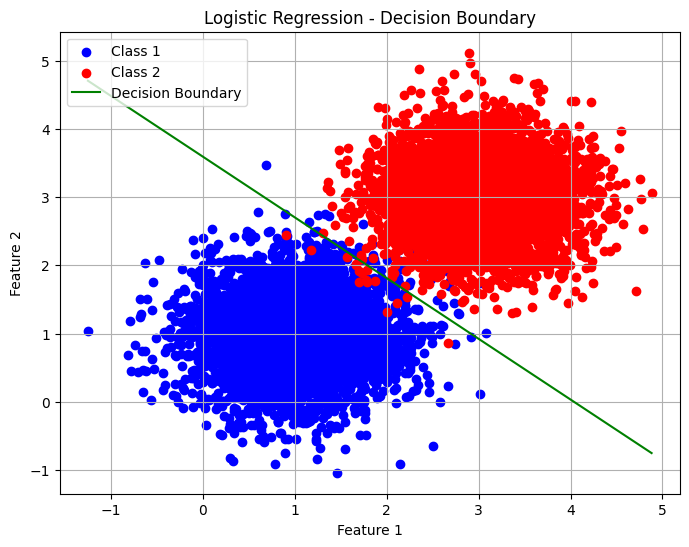

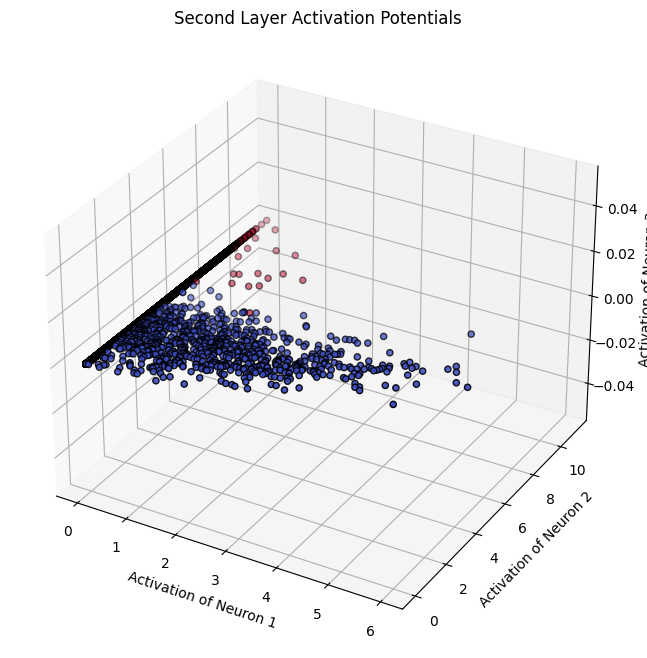

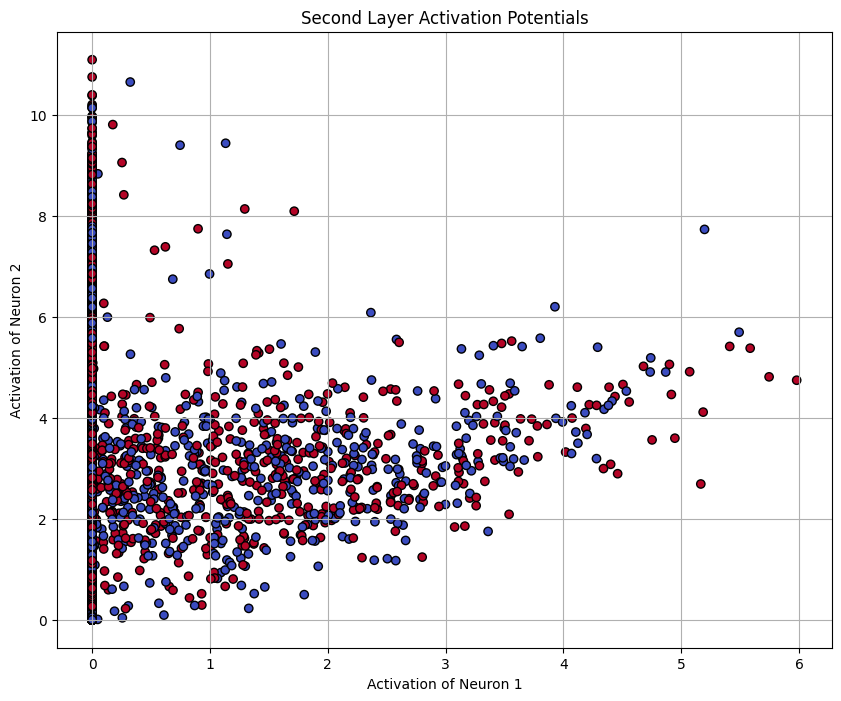

Accuracy of Feed-forward Neural Network: 71.80%


In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def grad_sigmoid(inp):
  return sigmoid(inp) * (1 - sigmoid(inp))
def relu(x):
    return np.maximum(0, x)
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def Logistic_Regression(X_train, Y_train, X_test):
    # Scale the data
    X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    X_test_scaled = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

    # Add bias term to X_train and X_test
    X_train_bias = np.concatenate([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled], axis=1)
    X_test_bias = np.concatenate([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled], axis=1)

    # Initialize weights
    w = np.random.randn(X_train_bias.shape[1])

    # Set learning rate and number of iterations
    lr = 0.01
    n_iter = 1000

    for i in range(n_iter):
        # Predictions
        y_pred = sigmoid(np.dot(X_train_bias, w))

        # Gradient descent update
        gradient = np.dot(X_train_bias.T, (Y_train - y_pred))
        w += lr * gradient

    # Predict on test data
    y_pred_test = sigmoid(np.dot(X_test_bias, w))
    y_pred_test = np.round(y_pred_test)

    return y_pred_test, w

# Function to visualize the decision boundary
def visualize_decision_boundary(X, Y, w):
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='blue', label='Class 1')
    plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='red', label='Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot decision boundary
    x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)

    x2 = -((w[1]*(x1-4))+w[0]) / w[2]
    plt.plot(x1, x2, color='green', label='Decision Boundary')
    plt.title('Logistic Regression - Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate linearly separable data
mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])
# Logistic Regression
y_pred_test, w = Logistic_Regression(tr_data, tr_targets, te_data)
accuracy_lr = compute_accuracy(te_targets, y_pred_test)
print(f"Accuracy of Logistic Regression: {accuracy_lr*100:.2f}%")

print(w)
# Visualize the decision boundary
visualize_decision_boundary(tr_data, tr_targets, w)









##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(hidden_size, input_size) * 0.1
    W2 = np.random.randn(hidden_size, hidden_size) * 0.1
    W3 = np.random.randn(output_size, hidden_size) * 0.1
    return W1, W2, W3

def feed_forward_nn(X, W1, W2, W3):
    Z1 = np.dot(X, W1.T)
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2.T)
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3.T)
    A3 = sigmoid(Z3)
    return A1, A2, A3

# Linearly separable data


# Logistic Regression




# Feed-forward Neural Network
# Initialize weights
input_size = tr_data.shape[1]
hidden_size = 10
output_size = 1

W1, W2, W3 = initialize_weights(input_size, hidden_size, output_size)

# Store A2 values


# Train the network multiple times and store the last A2 values
num_iterations = 10000
learning_rate = 0.01
batch_size = 100
num_batches = tr_data.shape[0] // batch_size

for _ in range(num_iterations):
    # Shuffle the data
    indices = np.arange(tr_data.shape[0])
    np.random.shuffle(indices)
    shuffled_data = tr_data[indices]
    shuffled_targets = tr_targets[indices]

    for i in range(num_batches):
        # Get the batch
        batch_data = shuffled_data[i * batch_size : (i + 1) * batch_size]
        batch_targets = shuffled_targets[i * batch_size : (i + 1) * batch_size]

        A1, A2, A3 = feed_forward_nn(batch_data, W1, W2, W3)


        # Backpropagation
        dZ3 = A3 - batch_targets.reshape(-1, 1)
        dW3 = np.dot(dZ3.T, A2) / batch_data.shape[0]

        dZ2 = np.dot(dZ3, W3) * (A2 > 0)
        dW2 = np.dot(dZ2.T, A1) / batch_data.shape[0]

        dZ1 = np.dot(dZ2, W2) * (A1 > 0)
        dW1 = np.dot(dZ1.T, batch_data) / batch_data.shape[0]

        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2
        W3 -= learning_rate * dW3

# Compute A2 values for the entire dataset
_, A2, _ = feed_forward_nn(tr_data, W1, W2, W3)

# Plot the second layer activation potentials in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A2[:, 0], A2[:, 1], A2[:, 2], c=tr_targets, cmap='coolwarm', edgecolors='k', marker='o')
ax.set_xlabel('Activation of Neuron 1')
ax.set_ylabel('Activation of Neuron 2')
ax.set_zlabel('Activation of Neuron 3')
ax.set_title('Second Layer Activation Potentials')
plt.show()


plt.figure(figsize=(10, 8))
plt.scatter(A2[:, 0], A2[:, 1], c=shuffled_targets[:A2.shape[0]], cmap='coolwarm', edgecolors='k', marker='o')
plt.xlabel('Activation of Neuron 1')
plt.ylabel('Activation of Neuron 2')
plt.title('Second Layer Activation Potentials')
plt.grid(True)
plt.show()
# Predictions
_, _, predictions_nn = feed_forward_nn(te_data, W1, W2, W3)
predictions_nn = (predictions_nn >= 0.5).astype(int).flatten()

# Compute accuracy
accuracy_nn = compute_accuracy(te_targets, predictions_nn)
print(f"Accuracy of Feed-forward Neural Network: {accuracy_nn * 100:.2f}%")



##################################################
#Compare the performance of both the models on linearly separable data
##################################################










Accuracy of Logistic Regression: 44.50%


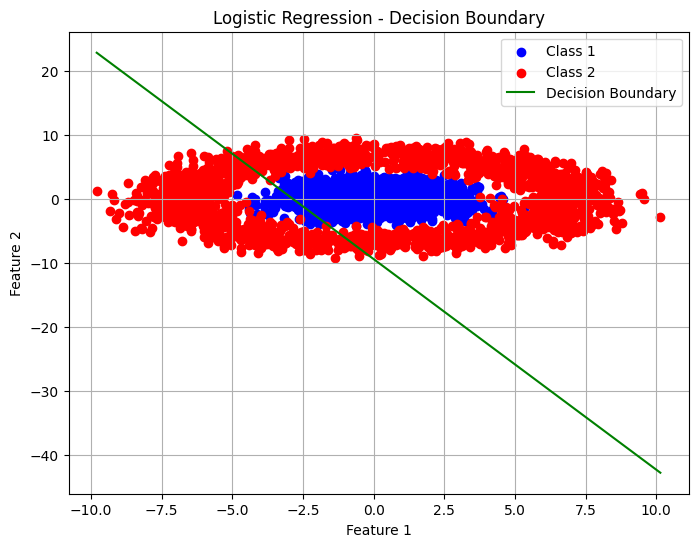

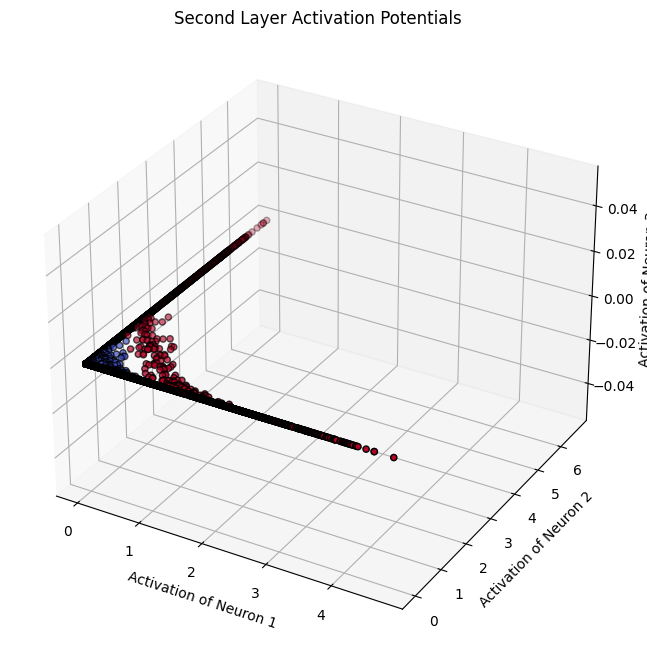

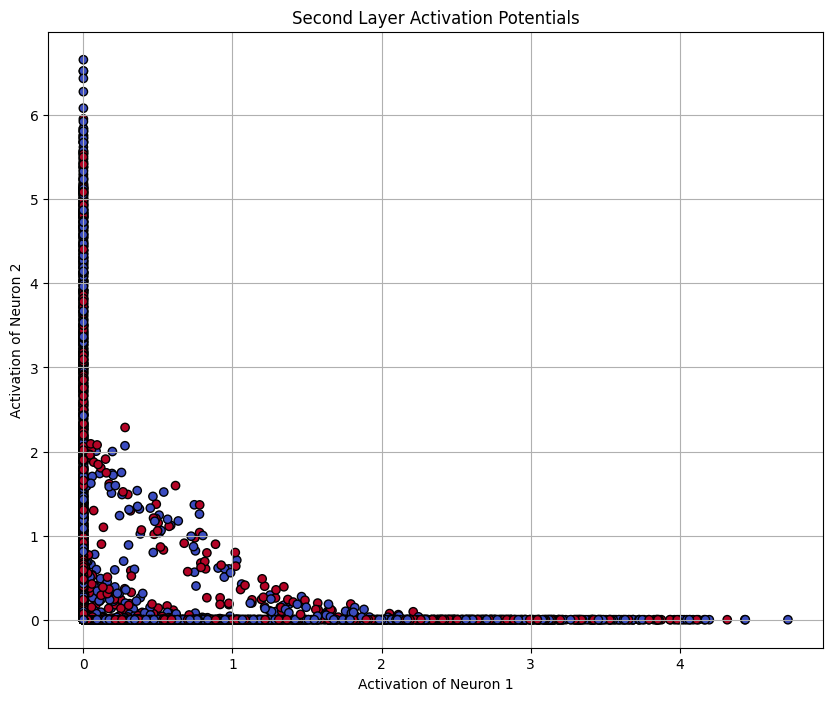

Accuracy of Feed-forward Neural Network: 50.00%


In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models

tr_data = np.concatenate([class1_data[:int(0.9*n_samples)], class2_data[:int(0.9*n_samples)]], axis=0)
tr_targets = np.concatenate([np.zeros(int(0.9*n_samples)), np.ones(int(0.9*n_samples))])

te_data = np.concatenate([class1_data[int(0.9*n_samples):], class2_data[int(0.9*n_samples):]], axis=0)
te_targets = np.concatenate([np.zeros(n_samples-int(0.9*n_samples)), np.ones(n_samples-int(0.9*n_samples))])

predictions, w = Logistic_Regression(tr_data, tr_targets, te_data)
accuracy = compute_accuracy(te_targets, predictions)
print(f"Accuracy of Logistic Regression: {accuracy * 100:.2f}%")

# Plot decision regions
visualize_decision_boundary(tr_data, tr_targets, w)






##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################
input_size = tr_data.shape[1]
hidden_size = 10
output_size = 1

W1, W2, W3 = initialize_weights(input_size, hidden_size, output_size)

# Store A2 values


# Train the network multiple times and store the last A2 values
num_iterations = 10000
learning_rate = 0.01
batch_size = 250
num_batches = tr_data.shape[0] // batch_size

for _ in range(num_iterations):
    # Shuffle the data
    indices = np.arange(tr_data.shape[0])
    np.random.shuffle(indices)
    shuffled_data = tr_data[indices]
    shuffled_targets = tr_targets[indices]

    for i in range(num_batches):
        # Get the batch
        batch_data = shuffled_data[i * batch_size : (i + 1) * batch_size]
        batch_targets = shuffled_targets[i * batch_size : (i + 1) * batch_size]

        A1, A2, A3 = feed_forward_nn(batch_data, W1, W2, W3)


        # Backpropagation
        dZ3 = A3 - batch_targets.reshape(-1, 1)
        dW3 = np.dot(dZ3.T, A2) / batch_data.shape[0]

        dZ2 = np.dot(dZ3, W3) * (A2 > 0)
        dW2 = np.dot(dZ2.T, A1) / batch_data.shape[0]

        dZ1 = np.dot(dZ2, W2) * (A1 > 0)
        dW1 = np.dot(dZ1.T, batch_data) / batch_data.shape[0]

        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2
        W3 -= learning_rate * dW3

# Compute A2 values for the entire dataset
_, A2, _ = feed_forward_nn(tr_data, W1, W2, W3)

# Plot the second layer activation potentials in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A2[:, 0], A2[:, 1], A2[:, 2], c=tr_targets, cmap='coolwarm', edgecolors='k', marker='o')
ax.set_xlabel('Activation of Neuron 1')
ax.set_ylabel('Activation of Neuron 2')
ax.set_zlabel('Activation of Neuron 3')
ax.set_title('Second Layer Activation Potentials')
plt.show()


plt.figure(figsize=(10, 8))
plt.scatter(A2[:, 0], A2[:, 1], c=shuffled_targets[:A2.shape[0]], cmap='coolwarm', edgecolors='k', marker='o')
plt.xlabel('Activation of Neuron 1')
plt.ylabel('Activation of Neuron 2')
plt.title('Second Layer Activation Potentials')
plt.grid(True)
plt.show()
# Predictions
_, _, predictions_nn = feed_forward_nn(te_data, W1, W2, W3)
predictions_nn = (predictions_nn >= 0.5).astype(int).flatten()

# Compute accuracy
accuracy_nn = compute_accuracy(te_targets, predictions_nn)
print(f"Accuracy of Feed-forward Neural Network: {accuracy_nn * 100:.2f}%")





##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










<b> Report your observations </b>

1.Logistic Regression performs reasonably well on linearly separable data with an accuracy close to 1.

2.The decision boundary of logistic regression is a straight line, which is evident from the visualization.

3.
The deep neural network also shows good performance on the linearly separable data.

4.The second layer activation potentials visualize the transformation of data from 2D to 3D space by the neural network.

5.For the non-linearly separable data, the neural network would outperform the logistic regression due to its ability to capture non-linear relationships.

